In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import set_option

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
# pd.set_option('display.max_rows', None)

In [2]:
def data_glimps(dataset):    
    print("Shape:",dataset.shape,"\n")
    print("Types:\n",dataset.dtypes,"\n")
    print("isnull:\n",dataset.isnull().sum(),"\n")
    print("Columns_names:\n",dataset.columns,"\n")
    
    fig,ax = plt.subplots(figsize=(9,7),squeeze=True)
    mask = np.zeros_like(dataset.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax.set_xticklabels(ax.xaxis.get_ticklabels(),fontsize=13,rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(),fontsize=13,rotation=30)
    sns.heatmap(dataset.corr(),vmin=-1, vmax=1, mask=mask, annot=True,ax=ax)
    plt.show()
    "\n"
    set_option('precision',5)

    display(dataset.describe())
    display(dataset.head())
    display(dataset.tail())

In [3]:
def col_unique_values(dataset):
    num_unique=[]
    for i in dataset.columns:
        num_unique.append(i+':'+str(len(dataset[i].unique())))
    print(num_unique)


In [4]:
def groupby_count(dataset,colum_str):
    return dataset.groupby(colum_str,as_index=False, sort=True).count()

In [5]:
def groupby_sum(dataset,colum_str):
    return dataset.groupby(colum_str,as_index=False, sort=True).sum()

In [6]:
# dataset,col_str, BETTER create a copy for this
def date_info(dataset,col_str):
    dataset[col_str]=pd.to_datetime(dataset[col_str])
    dataset['year']=dataset[col_str].dt.year
    dataset['month']=dataset[col_str].dt.month
    dataset['day_of_week']=dataset[col_str].dt.weekday_name
    dataset['hour']=dataset[col_str].dt.hour
    dataset['year_month']=[str(i)+'_'+str(j) for i,j in zip(dataset['year'], dataset['month'])]

In [7]:
def boxplot_num(col):
    Q1 = np.quantile(col, 0.25)
    Q2 = np.quantile(col, 0.5)
    Q3 = np.quantile(col, 0.75)
    Above = Q3 + 1.5*(Q3-Q1)
    Below = Q1 - 1.5*(Q3-Q1)
    print('Above',Above, '\n','Q3',Q3,'\n','Q2',Q2,'\n','Q1',Q1,'\n', 'Below',Below)

In [8]:
def groupby_count(dataset,colum_str):
    return dataset.groupby(colum_str).count()

In [9]:
video_stats = pd.read_csv("/Users/paxton615/Desktop/meclass/超大video_stats.csv")

wx_usr_login_account = pd.read_csv('/Users/paxton615/Desktop/meclass/wx_usr_login_account.csv')

words_video_friends_follow = pd.read_csv('/Users/paxton615/Desktop/meclass/words_video_friends_follow.csv')

words_video_favorite= pd.read_csv('/Users/paxton615/Desktop/meclass/words_video_favorite.csv')

words_video_comment = pd.read_csv("/Users/paxton615/Desktop/meclass/words_video_comment.csv",error_bad_lines=False)

words_video_comment_reply = pd.read_csv('/Users/paxton615/Desktop/meclass/words_video_comment_reply.csv')

words_video_comment_praise = pd.read_csv('/Users/paxton615/Desktop/meclass/words_video_comment_praise.csv')

subscribed_video_package = pd.read_csv('/Users/paxton615/Desktop/meclass/subscribed_video_package.csv')

r_word_video = pd.read_csv('/Users/paxton615/Desktop/meclass/r_word_video.csv')

r_video_tag = pd.read_csv('/Users/paxton615/Desktop/meclass/r_video_tag.csv')

pmsg_bind_account = pd.read_csv('/Users/paxton615/Desktop/meclass/pmsg_bind_account.csv')

pay_recharge_log = pd.read_csv('/Users/paxton615/Desktop/meclass/pay_recharge_log.csv')

pay_coupon= pd.read_csv('/Users/paxton615/Desktop/meclass/pay_coupon.csv')

pay_coupon_code= pd.read_csv('/Users/paxton615/Desktop/meclass/pay_coupon_code.csv')

paid_word_category= pd.read_csv('/Users/paxton615/Desktop/meclass/paid_word_category.csv')

mobilephone_stats= pd.read_csv('/Users/paxton615/Desktop/meclass/mobilephone_stats.csv')

daily_sign= pd.read_csv('/Users/paxton615/Desktop/meclass/daily_sign.csv')

ad_lesson_video= pd.read_csv('/Users/paxton615/Desktop/meclass/ad_lesson_video.csv')

b'Skipping line 186: expected 5 fields, saw 6\nSkipping line 524: expected 5 fields, saw 6\nSkipping line 2328: expected 5 fields, saw 7\nSkipping line 9947: expected 5 fields, saw 6\n'


# How many videos does each user watched?

In [10]:
# There are 4 million entries in this table, I would like to know that how many videos does each user watched 
# data_glimps(video_stats)

In [11]:
col_unique_values(video_stats)

['user_id:42826', 'device_id:1', 'video_id:3237', 'end_play_time:3871946', 'play_duration:5410', 'play_times:480', 'stats_time:491951', 'network:2', 'popularity:16058']


In [12]:
video_stats.user_id.unique()

array([    0,   304,   309, ..., 54994, 54995, 54996])

In [13]:
# Designed a counter to count the numbers
def occurDict(items):
    d = {}
    for i in items:
        if i in d:
            d[i] = d[i]+1
        else:
            d[i] = 1
    return d

In [14]:
watched_cnts=pd.DataFrame.from_dict(occurDict(video_stats.user_id),orient='index', columns=["watched_cnts"])

In [15]:
watched_cnts.head()

,watched_cnts
0,1210856
304,2916
309,689
311,549
312,568


In [16]:
#add new index, restore "user_id" 
watched_cnts.reset_index(level=0,inplace=True)

watched_cnts.rename(columns={'index':'user_id'},inplace=True)

In [17]:
# getting rid of"0" row, as it is the biggest outlier 
# as far as I know, "304" is our testing-account, can also be deleted

watched_cnts.drop([0,1], axis=0, inplace=True)

In [18]:
watched_cnts.head()

,user_id,watched_cnts
2,309,689
3,311,549
4,312,568
5,314,8
6,320,5


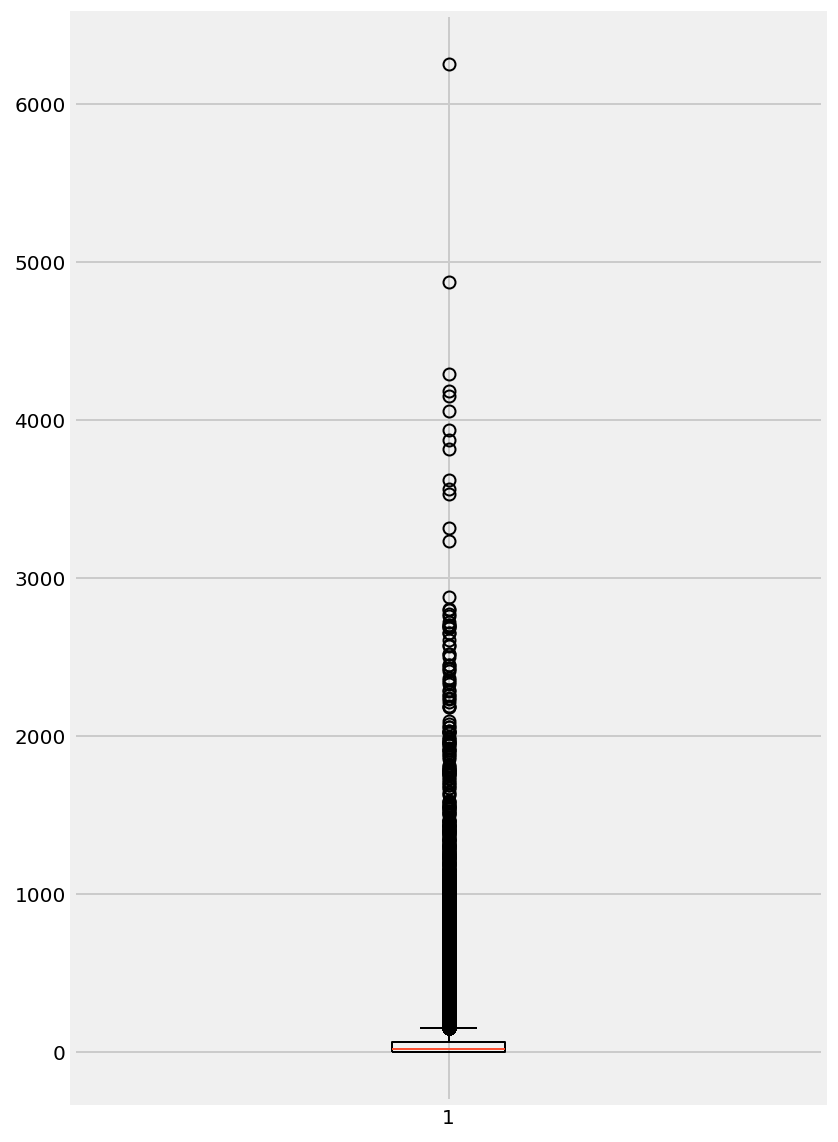

In [19]:
# Visualizing
fig,ax=plt.subplots(figsize=(6,10))
ax = plt.boxplot(watched_cnts['watched_cnts'])
# plt.ylim(0,6000,50)
# plt.yticks(np.arange(0, 6000, step=50))
plt.show()

In [20]:
watched_cnts[watched_cnts["watched_cnts"]>=4000]

,user_id,watched_cnts
26153,37496,4877
26447,37804,4188
27594,39001,6256
28842,40312,4295
30076,41574,4058
31594,43138,4154


In [21]:
# As the numbers show, we have gotten some huge fans there, lol

# Getting how much time does each user spent in our app

In [22]:
user_duration=video_stats.groupby('user_id', as_index=False, sort=True).play_duration.sum()

In [23]:
user_duration.drop([0,1],axis=0,inplace=True) 

In [24]:
user_duration.head()

,user_id,play_duration
2,309,57835
3,311,87544
4,312,35704
5,314,135
6,320,21


# The first merging

In [25]:
user_info = watched_cnts.merge(user_duration, on='user_id', how="outer")

In [26]:
(user_info.describe())

,user_id,watched_cnts,play_duration
count,42824.000000,42824.000000,4.282400e+04
mean,32049.864072,74.330119,4.672654e+03
std,13571.404628,187.727450,1.802105e+04
min,309.000000,1.000000,0.000000e+00
25%,20798.750000,5.000000,2.010000e+02
50%,32391.500000,19.000000,8.570000e+02
75%,43693.250000,65.000000,3.142250e+03
max,54996.000000,6256.000000,1.307506e+06


In [27]:
# remember:
# row 0 and row 304 have been deleted from the dataset.

# Planning to use 'following_user_id', it shows how active some users are

In [28]:
following_others = words_video_friends_follow[["following_user_id",'user_id']]

In [29]:
len(following_others)

45255

In [30]:
following_program_cnts=pd.DataFrame.from_dict(occurDict(following_others.following_user_id),orient='index', columns=["following_program_cnts"])

In [31]:
following_program_cnts.reset_index(level=0,inplace=True)

In [32]:
following_program_cnts.rename(columns={'index':'user_id'},inplace=True)

In [33]:
following_program_cnts.head()

,user_id,following_program_cnts
0,2264,38
1,2672,5
2,3054,15
3,3389,5
4,4382,11


In [34]:
user_info = user_info.merge(following_program_cnts, on='user_id', how="outer")
# Choosing how="outer" is because that I suspect that perhaps not all users followed programs.
# So, there must be some nulls in the dataset after merging

In [35]:
user_info.replace(np.nan, 0 , inplace=True)

In [36]:
user_info.head()

,user_id,watched_cnts,play_duration,following_program_cnts
0,309,689.0,57835.0,9.0
1,311,549.0,87544.0,4.0
2,312,568.0,35704.0,0.0
3,314,8.0,135.0,2.0
4,320,5.0,21.0,0.0


In [37]:
# Doing the some thing as 'following_user_id' to 'words_video_favorite'

In [38]:
favorite_video_cnts=pd.DataFrame.from_dict(occurDict(words_video_favorite.user_id),orient='index', columns=["following_video_cnts"])

In [39]:
favorite_video_cnts.reset_index(level=0,inplace=True)

In [40]:
favorite_video_cnts.drop([0],axis=0,inplace=True)

In [41]:
favorite_video_cnts.rename(columns={'index':'user_id'},inplace=True)

In [42]:
user_info = user_info.merge(favorite_video_cnts, on='user_id', how="outer")

In [43]:
user_info.replace(np.nan, 0 , inplace=True)

In [44]:
user_info.describe()

,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts
count,44957.000000,44957.000000,4.495700e+04,44957.000000,44957.000000
mean,31011.892008,70.803501,4.450959e+03,1.006629,5.625553
std,14110.587071,183.900004,1.761637e+04,2.263662,23.793979
min,304.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,19189.000000,4.000000,1.460000e+02,0.000000,0.000000
50%,31312.000000,17.000000,7.550000e+02,0.000000,1.000000
75%,43148.000000,61.000000,2.932000e+03,1.000000,4.000000
max,55006.000000,6256.000000,1.307506e+06,44.000000,2892.000000


In [45]:
# The number of user_id has grown after these two merging.

# Need to count how many times each user id appeared in words_video_coment['usr_id'] 

In [46]:
words_video_comment.head()

,id,target_id,usr_id,nickname,content
0,1,465,309,阿飞,要帅、要努力、要有事业、要受人尊重、要专一、要深情、要顾家、要陪孩子玩耍、要陪媳妇儿旅游。
1,2,463,304,梅先森,看过这片，太黑暗了
2,3,469,304,梅先森,（｡ӧ◡ӧ｡）
3,4,415,314,逆时针🐝,本来是来背单词的 但我光顾着看吃的了
4,5,471,309,阿飞,剧透：这哥们儿后来成为了麦当劳的大Boss


In [47]:
# counting times, reset index and rename index "user_id"
def elements_in_col_count(dataset_col):
    new_counts=pd.DataFrame.from_dict(occurDict(dataset_col),orient='index', columns=["cnts"])
    new_counts.reset_index(level=0,inplace=True)
    new_counts.rename(columns={'index':'user_id'},inplace=True)
    return new_counts

In [48]:
comment_counts=elements_in_col_count(words_video_comment.usr_id)

In [49]:
comment_counts.shape

(4410, 2)

In [50]:
comment_counts.replace(np.nan,0,inplace=True)

In [51]:
# found non-numeric characters in 'user_id' column, getting rid of them.
comment_counts.user_id = comment_counts.user_id.apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()

In [52]:
comment_counts.dtypes

user_id    float64
cnts         int64
dtype: object

In [53]:
comment_counts.astype('float',inplace=True).head(2)

,user_id,cnts
0,309.0,31.0
1,304.0,25.0


In [54]:
user_info = user_info.merge(comment_counts, on='user_id', how="outer")

In [55]:
user_info.rename(columns={'cnts':"comment_cnts"},inplace=True)
user_info.replace(np.nan,0,inplace=True)

In [56]:
user_info.describe()

,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts
count,45017.000000,45017.000000,4.501700e+04,45017.000000,45017.000000,45017.000000
mean,30978.788169,70.709132,4.445026e+03,1.005287,5.618055,0.360153
std,14131.853879,183.795560,1.760537e+04,2.262451,23.779003,3.717379
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,19142.000000,4.000000,1.450000e+02,0.000000,0.000000,0.000000
50%,31282.000000,17.000000,7.530000e+02,0.000000,1.000000,0.000000
75%,43133.000000,60.000000,2.927000e+03,1.000000,4.000000,0.000000
max,55006.000000,6256.000000,1.307506e+06,44.000000,2892.000000,345.000000


In [57]:
# The number of user_id is still growing

In [58]:
# counting subscribed users

In [59]:
def elements_in_col_count(dataset_col):
    new_counts=pd.DataFrame.from_dict(occurDict(dataset_col),orient='index', columns=["cnts"])
    new_counts.reset_index(level=0,inplace=True)
    new_counts.rename(columns={'index':'user_id'},inplace=True)
    return new_counts

In [60]:
sub_video_counts=elements_in_col_count(subscribed_video_package.buyer_id)

In [61]:
sub_video_counts.head()

,user_id,cnts
0,304,40
1,309,12
2,311,21
3,312,6
4,314,4


In [62]:
sub_video_counts.rename(columns={'cnts':"sub_video_counts"},inplace=True)

In [63]:
user_info = user_info.merge(sub_video_counts, on='user_id', how="outer")

In [64]:
user_info.replace(np.nan,0,inplace=True)

In [65]:
user_info.head()

,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts
0,309.0,689.0,57835.0,9.0,52.0,31.0,12.0
1,311.0,549.0,87544.0,4.0,38.0,25.0,21.0
2,312.0,568.0,35704.0,0.0,7.0,7.0,6.0
3,314.0,8.0,135.0,2.0,7.0,24.0,4.0
4,320.0,5.0,21.0,0.0,0.0,0.0,0.0


In [66]:
user_info.describe()

,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts
count,46782.000000,46782.000000,4.678200e+04,46782.000000,46782.000000,46782.000000,46782.000000
mean,30033.380638,68.041405,4.277324e+03,0.967359,5.406096,0.346565,0.482002
std,14692.961942,180.797710,1.729082e+04,2.227612,23.350661,3.647224,2.049433
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,17710.250000,3.000000,1.070000e+02,0.000000,0.000000,0.000000,0.000000
50%,30376.500000,16.000000,6.840000e+02,0.000000,1.000000,0.000000,0.000000
75%,42680.750000,57.000000,2.767000e+03,1.000000,4.000000,0.000000,0.000000
max,55006.000000,6256.000000,1.307506e+06,44.000000,2892.000000,345.000000,50.000000


In [67]:
user_info.sort_values(by='user_id', ascending=True).head(10)

,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts
44987,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44986,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44985,0.0,0.0,0.0,0.0,0.0,1.0,0.0
44984,0.0,0.0,0.0,0.0,0.0,40.0,0.0
42825,304.0,0.0,0.0,14.0,0.0,25.0,40.0
0,309.0,689.0,57835.0,9.0,52.0,31.0,12.0
1,311.0,549.0,87544.0,4.0,38.0,25.0,21.0
2,312.0,568.0,35704.0,0.0,7.0,7.0,6.0
3,314.0,8.0,135.0,2.0,7.0,24.0,4.0
4,320.0,5.0,21.0,0.0,0.0,0.0,0.0


In [68]:
# be aware, there are serval 0s in the 'user_id' column. 

# Taking device types into consideration. Wonder people have more expensive phones are more willing to buy things.

In [69]:
device_type = pmsg_bind_account[['user_id','device_type']]

In [70]:
device_type.shape

(52776, 2)

In [71]:
user_info = user_info.merge(device_type, on='user_id', how="outer")

In [72]:
user_info.head()

,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts,device_type
0,309.0,689.0,57835.0,9.0,52.0,31.0,12.0,4.0
1,311.0,549.0,87544.0,4.0,38.0,25.0,21.0,4.0
2,312.0,568.0,35704.0,0.0,7.0,7.0,6.0,3.0
3,312.0,568.0,35704.0,0.0,7.0,7.0,6.0,3.0
4,314.0,8.0,135.0,2.0,7.0,24.0,4.0,4.0


In [74]:
user_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53498 entries, 0 to 53497
Data columns (total 8 columns):
user_id                   53498 non-null float64
watched_cnts              46853 non-null float64
play_duration             46853 non-null float64
following_program_cnts    46853 non-null float64
following_video_cnts      46853 non-null float64
comment_cnts              46853 non-null float64
sub_video_counts          46853 non-null float64
device_type               52776 non-null float64
dtypes: float64(8)
memory usage: 3.7 MB


In [ ]:
# be careful of the nulls

# Checking users' locations

In [75]:
mobilephone_stats=mobilephone_stats[["id",'province']]

In [76]:
mobilephone_stats.rename(columns={'id':"user_id"},inplace=True)

In [77]:
user_info = user_info.merge(mobilephone_stats, on='user_id', how="left")

In [79]:
user_info.head()

,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts,device_type,province
0,309.0,689.0,57835.0,9.0,52.0,31.0,12.0,4.0,四川
1,311.0,549.0,87544.0,4.0,38.0,25.0,21.0,4.0,山西
2,312.0,568.0,35704.0,0.0,7.0,7.0,6.0,3.0,江苏
3,312.0,568.0,35704.0,0.0,7.0,7.0,6.0,3.0,江苏
4,314.0,8.0,135.0,2.0,7.0,24.0,4.0,4.0,浙江


# Also a good indicator for identifying active users

In [80]:
daily_signin=daily_sign[["user_id","total_day"]]

In [81]:
user_info = user_info.merge(daily_signin, on='user_id', how="outer")

In [82]:
user_info.rename(columns={'total_day':'signin_days'},inplace=True)

In [84]:
user_info.head()

,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts,device_type,province,signin_days
0,309.0,689.0,57835.0,9.0,52.0,31.0,12.0,4.0,四川,31.0
1,311.0,549.0,87544.0,4.0,38.0,25.0,21.0,4.0,山西,2.0
2,312.0,568.0,35704.0,0.0,7.0,7.0,6.0,3.0,江苏,11.0
3,312.0,568.0,35704.0,0.0,7.0,7.0,6.0,3.0,江苏,11.0
4,314.0,8.0,135.0,2.0,7.0,24.0,4.0,4.0,浙江,11.0


Shape: (53517, 10) 

Types:
 user_id                   float64
watched_cnts              float64
play_duration             float64
following_program_cnts    float64
following_video_cnts      float64
comment_cnts              float64
sub_video_counts          float64
device_type               float64
province                   object
signin_days               float64
dtype: object 

isnull:
 user_id                       0
watched_cnts               6664
play_duration              6664
following_program_cnts     6664
following_video_cnts       6664
comment_cnts               6664
sub_video_counts           6664
device_type                 741
province                   5677
signin_days               47871
dtype: int64 

Columns_names:
 Index(['user_id', 'watched_cnts', 'play_duration', 'following_program_cnts',
       'following_video_cnts', 'comment_cnts', 'sub_video_counts',
       'device_type', 'province', 'signin_days'],
      dtype='object') 



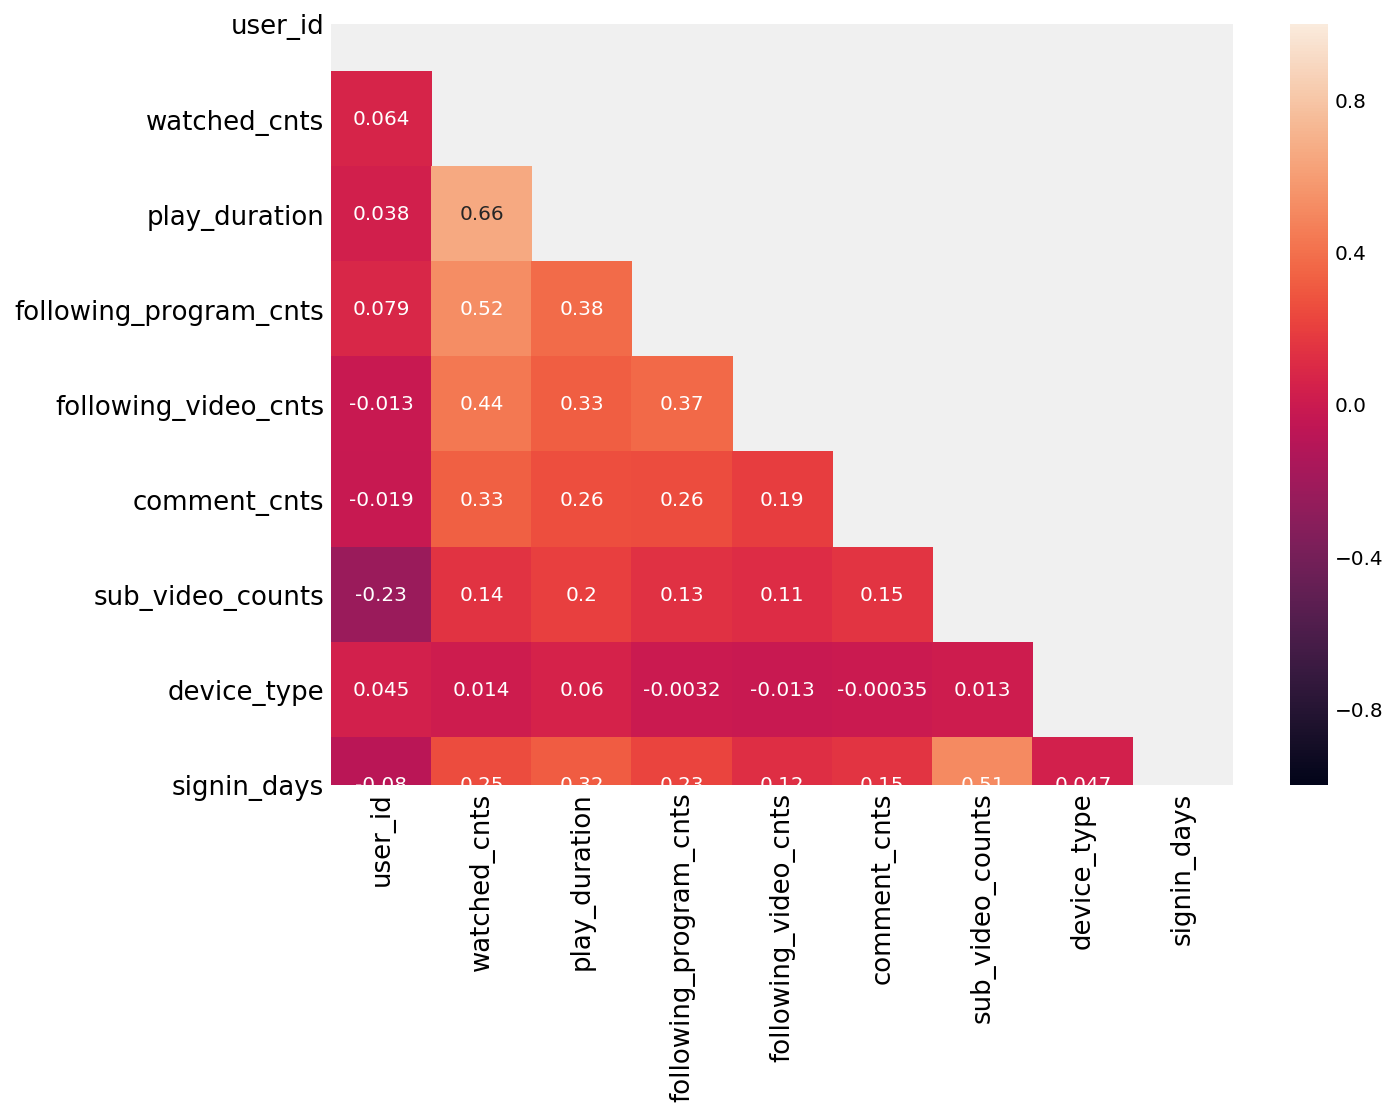

,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts,device_type,signin_days
count,53517.00000,46853.00000,4.68530e+04,46853.00000,46853.00000,46853.00000,46853.00000,52776.00000,5646.00000
mean,27793.66366,68.09203,4.27838e+03,0.96790,5.40676,0.35611,0.48731,3.10175,6.56164
std,15633.80854,181.44728,1.72902e+04,2.23388,23.34587,3.98345,2.07796,0.30232,15.11804
min,0.00000,0.00000,0.00000e+00,0.00000,0.00000,0.00000,0.00000,3.00000,1.00000
25%,14270.00000,3.00000,1.06000e+02,0.00000,0.00000,0.00000,0.00000,3.00000,1.00000
50%,27794.00000,15.00000,6.83000e+02,0.00000,1.00000,0.00000,0.00000,3.00000,2.00000
75%,41295.00000,57.00000,2.76700e+03,1.00000,4.00000,0.00000,0.00000,3.00000,4.00000
max,55006.00000,6256.00000,1.30751e+06,44.00000,2892.00000,345.00000,50.00000,4.00000,372.00000


,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts,device_type,province,signin_days
0,309.0,689.0,57835.0,9.0,52.0,31.0,12.0,4.0,四川,31.0
1,311.0,549.0,87544.0,4.0,38.0,25.0,21.0,4.0,山西,2.0
2,312.0,568.0,35704.0,0.0,7.0,7.0,6.0,3.0,江苏,11.0
3,312.0,568.0,35704.0,0.0,7.0,7.0,6.0,3.0,江苏,11.0
4,314.0,8.0,135.0,2.0,7.0,24.0,4.0,4.0,浙江,11.0


,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts,device_type,province,signin_days
53512,4736.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
53513,4752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
53514,10489.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
53515,16734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
53516,39371.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [85]:
data_glimps(user_info)

# Merging process is done. 

# Last EDA

In [86]:
user_info.drop_duplicates(keep='first',inplace=True)

In [87]:
user_info.replace(np.nan,0,inplace=True)

In [88]:
user_info=user_info.sort_values(by="user_id",ascending=True)

In [89]:
user_info.reset_index(drop=True, inplace=True)

In [90]:
user_info.head()

,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts,device_type,province,signin_days
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0.0
1,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0,0.0
2,303.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,北京,0.0
3,304.0,0.0,0.0,14.0,0.0,25.0,40.0,4.0,山东,40.0
4,306.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,安徽,0.0


In [91]:
user_info.drop([0,1,3],inplace=True)

In [92]:
user_info.reset_index(drop=True, inplace=True)

In [93]:
user_info

,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts,device_type,province,signin_days
0,303.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,北京,0.0
1,306.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,安徽,0.0
2,309.0,689.0,57835.0,9.0,52.0,31.0,12.0,4.0,四川,31.0
3,310.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,浙江,0.0
4,311.0,549.0,87544.0,4.0,38.0,25.0,21.0,4.0,山西,2.0
5,312.0,568.0,35704.0,0.0,7.0,7.0,6.0,3.0,江苏,11.0
6,313.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,浙江,0.0
7,314.0,8.0,135.0,2.0,7.0,24.0,4.0,4.0,浙江,11.0
8,316.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,四川,0.0
9,317.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,山西,0.0


Shape: (53432, 10) 

Types:
 user_id                   float64
watched_cnts              float64
play_duration             float64
following_program_cnts    float64
following_video_cnts      float64
comment_cnts              float64
sub_video_counts          float64
device_type               float64
province                   object
signin_days               float64
dtype: object 

isnull:
 user_id                   0
watched_cnts              0
play_duration             0
following_program_cnts    0
following_video_cnts      0
comment_cnts              0
sub_video_counts          0
device_type               0
province                  0
signin_days               0
dtype: int64 

Columns_names:
 Index(['user_id', 'watched_cnts', 'play_duration', 'following_program_cnts',
       'following_video_cnts', 'comment_cnts', 'sub_video_counts',
       'device_type', 'province', 'signin_days'],
      dtype='object') 



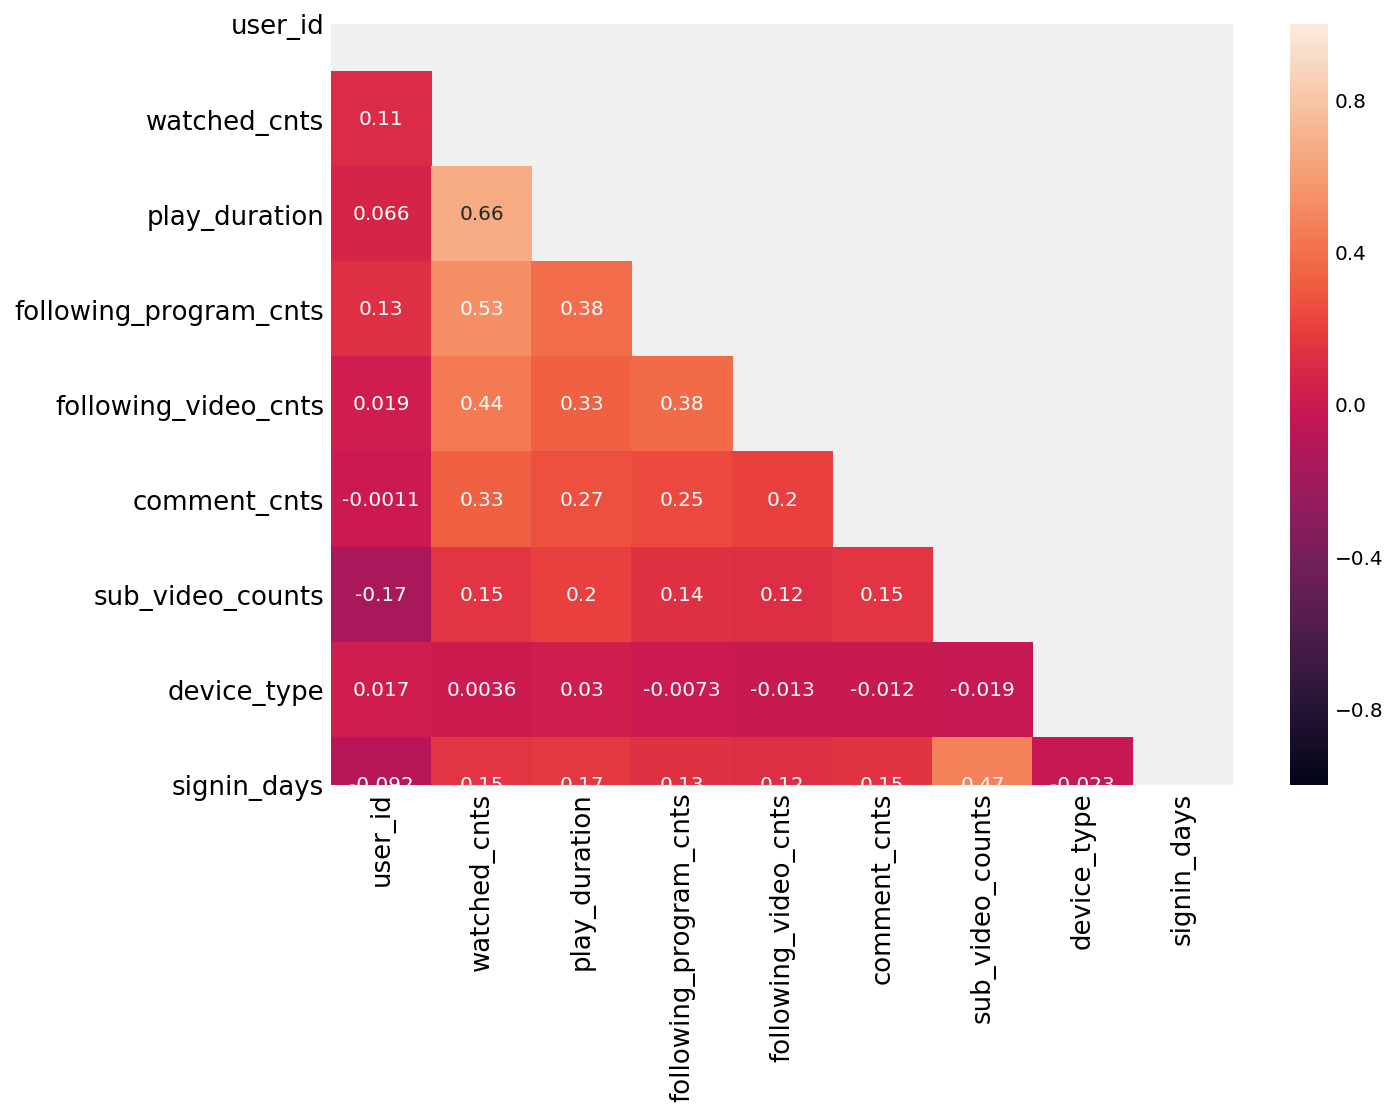

,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts,device_type,signin_days
count,53432.00000,53432.00000,5.34320e+04,53432.00000,53432.00000,53432.00000,53432.00000,53432.00000,53432.00000
mean,27830.82078,59.58111,3.74552e+03,0.84683,4.73347,0.30218,0.42128,3.05835,0.68362
std,15613.82075,170.65959,1.62406e+04,2.10797,21.92202,3.40864,1.91662,0.46954,5.25814
min,303.00000,0.00000,0.00000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,14329.75000,1.00000,1.90000e+01,0.00000,0.00000,0.00000,0.00000,3.00000,0.00000
50%,27832.50000,10.00000,4.54000e+02,0.00000,1.00000,0.00000,0.00000,3.00000,0.00000
75%,41314.25000,47.00000,2.23900e+03,1.00000,3.00000,0.00000,0.00000,3.00000,0.00000
max,55006.00000,6256.00000,1.30751e+06,44.00000,2892.00000,345.00000,50.00000,4.00000,372.00000


,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts,device_type,province,signin_days
0,303.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,北京,0.0
1,306.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,安徽,0.0
2,309.0,689.0,57835.0,9.0,52.0,31.0,12.0,4.0,四川,31.0
3,310.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,浙江,0.0
4,311.0,549.0,87544.0,4.0,38.0,25.0,21.0,4.0,山西,2.0


,user_id,watched_cnts,play_duration,following_program_cnts,following_video_cnts,comment_cnts,sub_video_counts,device_type,province,signin_days
53427,55002.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0,0.0
53428,55003.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0,0.0
53429,55004.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,0,0.0
53430,55005.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0.0
53431,55006.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0,0.0


In [94]:
data_glimps(user_info)